## Load Suite SDK
### Please update spb-cli with 'pip install spb-cli --upgrade'

In [1]:
import spb.sdk

# Print Suite SDK version
print(spb.sdk.__version__)

0.14.2


### Initialize Client with Team name and Access Key

In [4]:
import os

project_name="PROJECT_NAME"
team_name = "TEAM_NAME"
access_key = "ACCESS_KEY"
client = spb.sdk.Client(project_name=project_name, team_name=team_name, access_key=access_key)
# Print project information
print('Project Name: {}'.format(client.get_project_name()))
print('Total number of data: {}'.format(client.get_num_data()))

[INFO] Usage: Client has been started with superb-ai-demo
Project Name: test_drawing
Total number of data: 8


### Set the label id of the image that you want to get

In [5]:
label_id = 'bd2dbd9c-04a5-43a6-998f-5abd7e4b945e'
data_handler = client.get_data(id=label_id)

### Download the image that you want

Content-Type: application/octet-stream
Content-Length: 71056
Connection: close
Date: Mon, 21 Nov 2022 01:55:34 GMT
Last-Modified: Sun, 06 Nov 2022 10:03:01 GMT
ETag: "aab4029be982441b8dc2e80ce7892e65"
x-amz-server-side-encryption: AES256
x-amz-version-id: 2iFfNuml0tRE0ohpF1k7GPGDRvEe9iL6
Accept-Ranges: bytes
Server: AmazonS3
X-Cache: Hit from cloudfront
Via: 1.1 98cc70c99d4e07b8cd37265dc48c5a54.cloudfront.net (CloudFront)
X-Amz-Cf-Pop: ICN57-P2
X-Amz-Cf-Id: qpaMY4d4JsJjEDcp5MNym2iO5ZTJ4MtEhd_UB8-VJMfWlD_hfykmrQ==
Age: 28




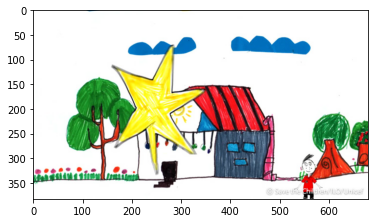

In [7]:
download_path, result = data_handler.download_image(download_to='./test.jpg')

# Print the HTTP response
print(result)

# Plot the downloaded image
import PIL.Image
import matplotlib.pyplot as plt

image = PIL.Image.open(download_path)
plt.imshow(image)

### This shows how you can get label data

In [8]:
data_iter = client.get_data_page(page=1, page_size=10)
data_handler = next(data_iter)

# Print data information
print('Id: {}'.format(data_handler.get_id())) # or data_handler.data.id
print('Key: {}'.format(data_handler.get_key())) # or data_handler.data.key
print('Dataset: {}'.format(data_handler.get_dataset_name())) # or data_handler.data.dataset
print('Image URL: {}'.format(data_handler.get_image_url())) # or data_handler.data.data_url
print('Status: {}'.format(data_handler.get_status())) # or data_handler.data.status
print('Last Review Action: {}'.format(data_handler.get_last_review_action())) # or data_handler.data.last_review_action
print('Data Info: {}'.format(data_handler.data.to_json()))

Id: 078239a8-6a8a-458e-beec-2b1dd2457419
Key: cartoon-1082003_960_720.jpeg
Dataset: drawing
Image URL: https://suite-asset.superb-ai.com/apne2/tenants/superb-ai-demo/assets/038c8468-3182-47c4-a77c-bba7ea79207f/image.jpeg?Expires=1668999934&Signature=Qhl4y8z-8SE10j3R3A5JLe6a5N-V85IVal1fnnV0czmJA2tf~GU-hncVaaENZyQnezZlu2OPN7hDs08zybWPfB2xGuDYNdM4sEfkh8FjY0ClwfVPEOTzTne7zSkctZIYf2tJLXRfSl2d0PUDELIeaw6NFpAJhs6SbL8LhFDseAseGEbWYw38q1hTXRuRiwUPgPUMnjyz7sMLLAs5stW1sg-kSw1-4eT3lcKr862tNW0EVj75aVepwYSHEzv547HorhNxUartc1h7QX6ZfIbp1oaf4c8msctObYXY5UzJctK8TU2a6OKztWTwNWy4Ul45ubfxJl2NsnX6YDKb1~yihQ__&Key-Pair-Id=APKAI23CZB2SCQMZ57IA
Status: WORKING
Last Review Action: 
Data Info: {'id': '078239a8-6a8a-458e-beec-2b1dd2457419', 'status': 'WORKING', 'work_assignee': '', 'reviewer': '', 'review_round': 0, 'last_review_action': '', 'workapp': 'IMAGE_SIESTA', 'consistency_score': 0, 'stats': [], 'tags': [], 'result': {'objects': [], 'categories': {'properties': []}, 'difficulty': 1}, 'created_by': 'jenny

### Download only 'SUBMITTED' labels

In [14]:
# Total number of data in your dataset
num_data = client.get_num_data()
num_page = (num_data + 9) // 10

print('Total number of data: {}'.format(num_data))

for page_idx in range(num_page):
    for data_handler in client.get_data_page(page_idx=page_idx, page_size=10):
        if data_handler.get_status() == 'SUBMITTED':
            download_path, result = data_handler.download_image(download_to='./' + data_handler.get_key())


### Download Labels with certain tags

In [15]:
tags = ['test']

# Number of data containing all the tags
num_data = client.get_num_data(tags=tags)
num_page = (num_data + 9) // 10

print('Number of data containing tags {}: {}'.format(tags, num_data))

# Get data iterator in the filtered list of data
for page_idx in range(num_page):
    for data_handler in client.get_data_page(page_idx=page_idx, page_size=10, tags=tags):
        download_path, result = data_handler.download_image(download_to='./' + data_handler.get_key())


Number of data containing tags ['test']: 3
